Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
#HBDbhdhbsdhq
# Définir le chemin d'accès complet au fichier CSV
file_path = 'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli232.csv'

# Lire le fichier CSV
df = pd.read_csv(file_path)

Get data and distribution of income and totexp

In [2]:
# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "FINATXE1", "TOTEXPCQ","TOTEXPPQ", "FINCBTAX", "CUTENURE", "SHELTCQ", "EHOUSNGP", "HOUSCQ", "UTILCQ", "HOUSOPCQ", "RNTXRPCQ", 
                     "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF","FINCBTX1","ETOTAPX4"]
data_ce = df[columns_to_select]

# 1. Afficher les premières lignes
print(data_ce.head())

# 2. Obtenir des informations sur les colonnes
print(data_ce.info())

# 3. Résumé statistique
print(data_ce.describe())

# 4. Vérification des valeurs manquantes
print(data_ce.isnull().sum())


     NEWID  FINATXE1  TOTEXPCQ    TOTEXPPQ  FINCBTAX  CUTENURE  SHELTCQ  \
0  5090604     40677       0.0  11781.0000     40677         2      0.0   
1  5090624     13787       0.0   3126.0000     13787         4      0.0   
2  5090634    107059       0.0  19466.0001    135000         1      0.0   
3  5090664     48569       0.0  10016.3500         0         1      0.0   
4  5090674     36475       0.0  55544.7499     37420         4      0.0   

   EHOUSNGP  HOUSCQ  UTILCQ  ...  RNTXRPCQ  APPARCQ  MAJAPPCQ  FURNTRCQ  \
0    4464.0     0.0     0.0  ...       0.0      0.0       0.0       0.0   
1    1215.0     0.0     0.0  ...       0.0      0.0       0.0       0.0   
2    6000.0     0.0     0.0  ...       0.0      0.0       0.0       0.0   
3    3569.0     0.0     0.0  ...       0.0      0.0       0.0       0.0   
4    6742.0     0.0     0.0  ...       0.0      0.0       0.0       0.0   

   HLTHINCQ  ECARTKNC  ECARTKUC  AGE_REF  FINCBTX1  ETOTAPX4  
0       0.0       0.0       0.0    

Annual Households income

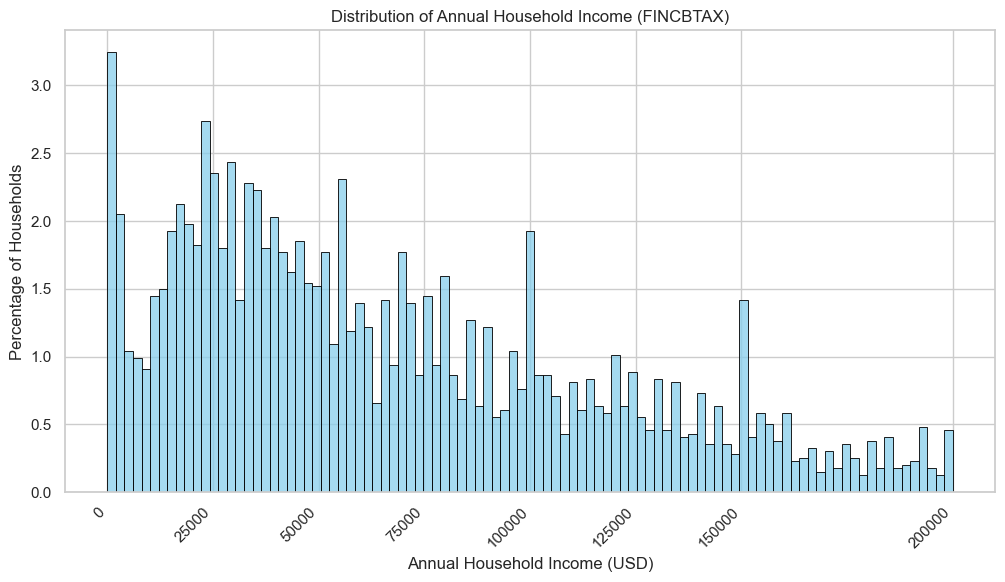

In [3]:
# Supprimer les lignes où FINCBTAX ou TOTEXPCQ sont égaux à 0
data_1 = data_ce[(data_ce['FINCBTAX'] > 0)]

# Configurer le style de seaborn
sns.set(style="whitegrid")

# Définir les nouveaux bins pour l'histogramme
# Raffinement entre 0 et 10,000
income_bins =  list(np.linspace(0, 200000, 100))  # 100 bins en total

# Créer l'histogramme avec la courbe de densité
plt.figure(figsize=(12, 6))
sns.histplot(data_1['FINCBTAX'], bins=income_bins, kde=False, color='skyblue', stat='percent', edgecolor='black')

# Ajouter des étiquettes et un titre
plt.title('Distribution of Annual Household Income (FINCBTAX)')
plt.xlabel('Annual Household Income (USD)')
plt.ylabel('Percentage of Households')

# Personnaliser les ticks de l'axe x pour afficher des valeurs arbitraires de revenus
x_tick_labels = [0, 25000, 50000, 75000, 100000, 125000, 150000, 200000]
plt.xticks(x_tick_labels, rotation=45, ha='right')  # Rotation diagonale pour une meilleure lisibilité

plt.show()


Income decile 

C:\Users\ludov\AppData\Local\Temp\ipykernel_12480\4037441047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['income_decile'] = pd.qcut(data_1['FINCBTAX'], 10, labels=[f'D{i+1}' for i in range(10)])
C:\Users\ludov\AppData\Local\Temp\ipykernel_12480\4037441047.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_by_decile = data_1.groupby('income_decile')['FINCBTAX'].mean().reset_index()
C:\Users\ludov\AppData\Local\Temp\ipykernel_12480\4037441047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

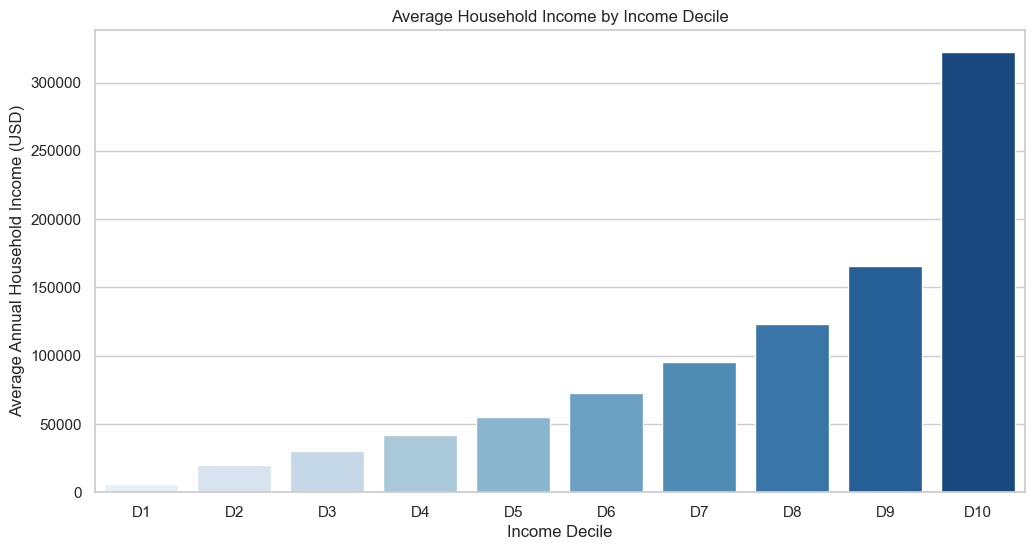

In [4]:
# Supposons que data_ce soit déjà défini et que les lignes avec FINCBTAX ou TOTEXPCQ égales à 0 aient été supprimées
data_1 = data_ce[(data_ce['FINCBTAX'] > 0) & (data_ce['TOTEXPCQ'] > 0)]

# Créer une nouvelle colonne pour le décile de revenus
data_1['income_decile'] = pd.qcut(data_1['FINCBTAX'], 10, labels=[f'D{i+1}' for i in range(10)])

# Calculer la moyenne des revenus par décile
average_income_by_decile = data_1.groupby('income_decile')['FINCBTAX'].mean().reset_index()

# Configurer le style de seaborn
sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x='income_decile', y='FINCBTAX', data=average_income_by_decile, palette='Blues')

# Ajouter des étiquettes et un titre
plt.title('Average Household Income by Income Decile')
plt.xlabel('Income Decile')
plt.ylabel('Average Annual Household Income (USD)')

plt.show()


Annual households expenditure 

In [5]:
import pandas as pd

# Définir le chemin d'accès complet aux fichiers CSV
file_paths = [
    'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli232.csv',
    'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli233.csv',
    'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli234.csv',
    'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli241.csv'
]




CE as share of quarterly expenditure ?

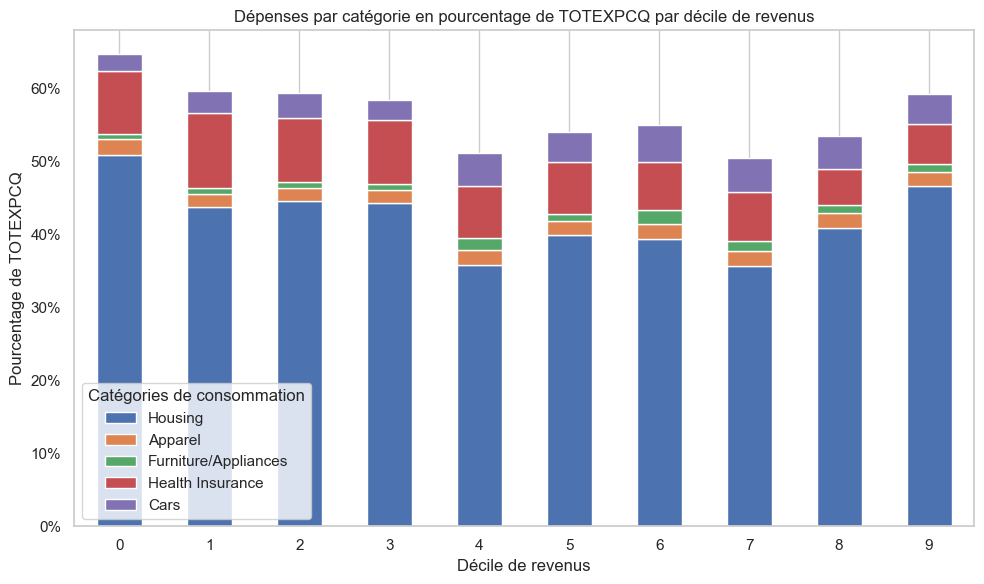

In [6]:

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "FINATXE1", "TOTEXPCQ", "FINCBTAX", "CUTENURE", "SHELTCQ", "EHOUSNGP", "HOUSCQ", "UTILCQ", "HOUSOPCQ", "RNTXRPCQ", 
                     "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF"]
data_ce = df[columns_to_select]

# Supprimer les lignes où TOTEXPCQ est égal à 0
data_ce = data_ce[data_ce["TOTEXPCQ"] != 0]

# Créer une nouvelle variable qui compare FINATXE1 et TOTEXPCQ
#data_ce['comparison'] = (data_ce['FINCBTAX'] < data_ce['TOTEXPCQ']).astype(int)

# Supprimer les observations où FINATXE1 < TOTEXPCQ
data_ce = data_ce[data_ce['FINCBTAX'] >= data_ce['TOTEXPCQ']]

# Calculer les parts pour les autres catégories
data_ce.loc[:, "Housing"] = ((data_ce["EHOUSNGP"] - data_ce["UTILCQ"] - data_ce["HOUSOPCQ"] - data_ce["FURNTRCQ"] - data_ce["MAJAPPCQ"]) / data_ce["TOTEXPCQ"]) * 100
data_ce.loc[:, "Apparel"] = (data_ce["APPARCQ"] / data_ce["TOTEXPCQ"]) * 100
data_ce.loc[:, "Furniture/Appliances"] = ((data_ce["FURNTRCQ"] + data_ce["MAJAPPCQ"]) / data_ce["TOTEXPCQ"]) * 100
data_ce.loc[:, "Health Insurance"] = (data_ce["HLTHINCQ"] / data_ce["TOTEXPCQ"]) * 100
data_ce.loc[:, "Cars"] = ((data_ce["ECARTKUC"] + data_ce["ECARTKNC"]) / data_ce["TOTEXPCQ"]) * 100

# Classer les individus par décile de revenus (FINCBTAX)
data_ce['decile'] = pd.qcut(data_ce['FINCBTAX'], 10, labels=False, duplicates='drop')

# Calculer la moyenne des dépenses par décile
decile_summary = data_ce.groupby('decile')[["Housing", "Apparel", "Furniture/Appliances", "Health Insurance", "Cars"]].mean()

# Créer le graphique
decile_summary.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des labels et un titre
plt.title('Dépenses par catégorie en pourcentage de TOTEXPCQ par décile de revenus')
plt.xlabel('Décile de revenus')
plt.ylabel('Pourcentage de TOTEXPCQ')
plt.xticks(rotation=0)  # Pour garder les étiquettes horizontales

# Afficher les pourcentages dans les barres
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(title='Catégories de consommation')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()
